## Parte 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

#Algoritmi
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


### Punto 1.1

In [2]:
dataset = pd.read_csv('HR_comma_sep_orig.csv', sep = ',')
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


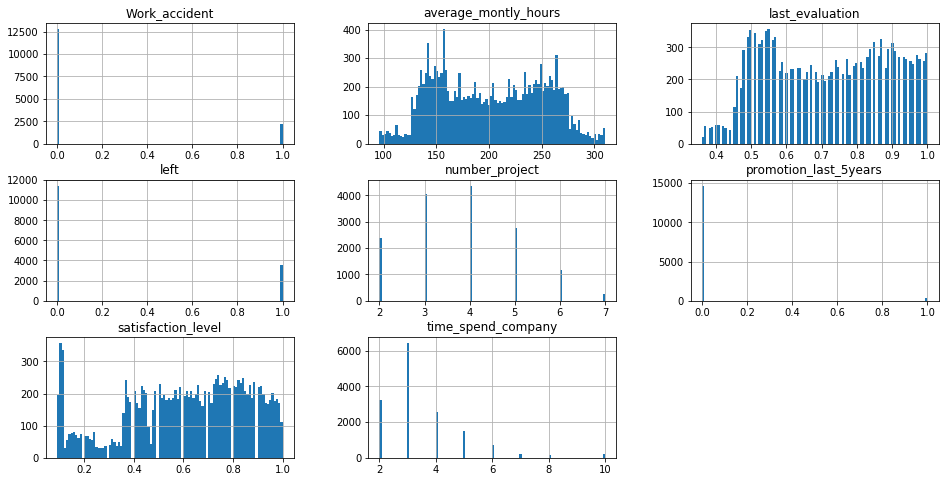

In [3]:
# Distrubizione valori
dataset.hist(figsize = (16,8), bins = 100)
plt.show()

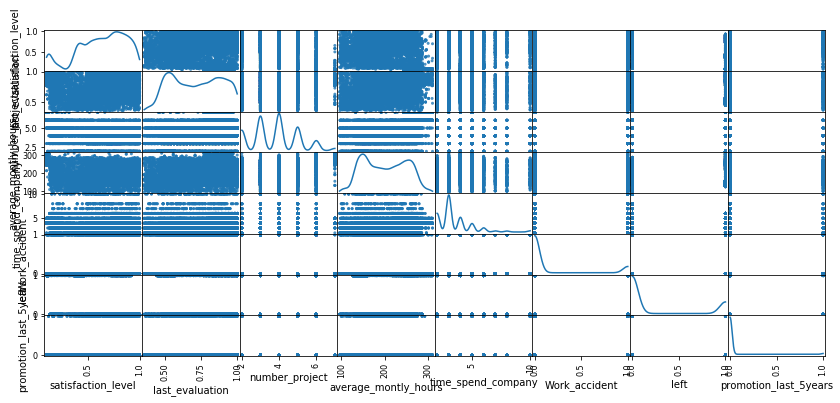

In [4]:
## Correlazione delle features tra di loro
scatter_matrix(dataset, alpha = 0.8, figsize = (14, 6), diagonal = 'kde')
plt.show()

In [5]:
# Correlazione delle features
dataset.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### Punto 1.2

In [6]:
num_istanze = dataset.shape[0]
print('Numero istanze:',num_istanze)
# Conto i valori nulla (somma prima sulle righe e poi sulle colonne)
num_nan = dataset.isna().sum().sum()
print('Il numero di valori nulli:', num_nan)
bool_nan = dataset.isna().any().any()
print('Sono presenti valori nulli: ', bool_nan == True)
print('*' * 100)
predict_count = dataset['left'].value_counts()
num_0 = predict_count[0]
num_1 = predict_count[1]
print('Elementi della classe 1: {}\nElementi della classe 2: {}'.format(num_1, num_0))

Numero istanze: 14999
Il numero di valori nulli: 0
Sono presenti valori nulli:  False
****************************************************************************************************
Elementi della classe 1: 3571
Elementi della classe 2: 11428


### Punto 1.3

In [7]:
mean = dataset.groupby(['left', 'promotion_last_5years'])['satisfaction_level'].mean().unstack()
print('Media:')
mean

Media:


promotion_last_5years,0,1
left,,
0,0.666766,0.668433
1,0.439992,0.460000


In [8]:
median = dataset.groupby(['left', 'promotion_last_5years'])['satisfaction_level'].median().unstack()
print('Mediana:')
median

Mediana:


promotion_last_5years,0,1
left,,
0,0.69,0.695
1,0.41,0.440


### Punto 1.4

Mediana: 0.640


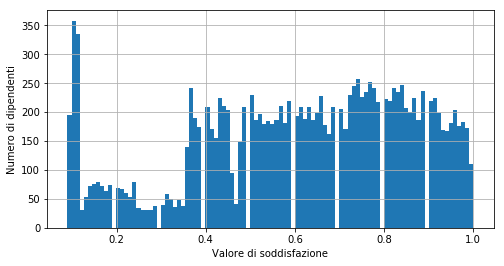

****************************************************************************************************
Le caratteristiche di questo blocco di dipendenti sono:
satisfaction_level         0.129832
last_evaluation            0.803935
number_project             5.484790
average_montly_hours     246.174110
time_spend_company         4.238188
Work_accident              0.102265
left                       0.598706
promotion_last_5years      0.010356
Name: 0.0 - 0.1, dtype: float64


In [9]:
print('Mediana: {:.3f}'.format(dataset['satisfaction_level'].median()))

array_satisfaction = dataset['satisfaction_level']
array_satisfaction.hist(figsize=(8, 4), bins = 100)
plt.xlabel('Valore di soddisfazione')
plt.ylabel('Numero di dipendenti')
plt.show()

# Creo le labels in automatico
labels = []
num_chunks = 10
for i in np.arange(0.0, 1.0, 0.1): # Va a 0.0 a 1.0 a step di 0.1
    label = '{:0.2} - {:0.2}'.format(i, i + 0.1)
    labels.append(label)

#satisfaction_grouped = pd.cut(dataset['satisfaction_level'], np.arange(0, 1.01, 0.1))
# Raggruppo i valori in 10 range 0.1 a 1.0
satisfaction_grouped = pd.qcut(dataset['satisfaction_level'], num_chunks, labels)
# Calcolo i valori medi di ogni gruppo
dataset_mean_sg = dataset.groupby(satisfaction_grouped).mean()
# Prendo il gruppo con soddisfazione minima
min_satisfaction = dataset_mean_sg.iloc[0]
print('*' * 100)
print('Le caratteristiche di questo blocco di dipendenti sono:\n{}'.format(min_satisfaction))

### Punto 1.5

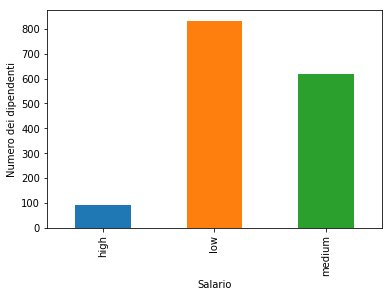

****************************************************************************************************
Il numero di dipendenti con salario inferiore a 0.22 hanno un salario
Alto: 92
Medio: 620
Basso: 833


In [10]:
# Prendo il valore di soddisfazione minimo del secondo blocco
min_satisfacion_for_range = dataset['satisfaction_level'].groupby(satisfaction_grouped).min()
min_satisfaction = min_satisfacion_for_range.iloc[1]
# Ricerco i dipendenti che hanno un valore di soffisfazione minore di tale soglia
dip_ins = dataset[dataset['satisfaction_level'] < min_satisfaction]
salary = dip_ins.groupby(['salary']).size()
salary.plot(kind = 'bar')
plt.xlabel('Salario')
plt.ylabel('Numero dei dipendenti')
plt.show()
print('*' * 100)
salary_high = salary['high']
salary_medium = salary['medium']
salary_low = salary['low']
print('Il numero di dipendenti con salario inferiore a {} hanno un salario'.format(min_satisfaction))
print('Alto: {}'.format(salary_high))
print('Medio: {}'.format(salary_medium))
print('Basso: {}'.format(salary_low))

### Punto 1.5

In [11]:
#Calcolo i settori
series_sales = dip_ins.groupby(dip_ins['sales'], as_index = False).size()
# Li ordino per valore
series_sales = series_sales.sort_values(ascending = False)
# Nomi settori
names_sales = series_sales.index.values
# Prendo i primi cinque valori
max_sales = names_sales[: 5]
print('I settori in cui i dipendenti sono maggiormente insoddisfatti\n{}'.format(max_sales))
print('*' * 100)
print('In particolare si ha la seguente corrispondenza\n{}'.format(series_sales.head()))

I settori in cui i dipendenti sono maggiormente insoddisfatti
['sales' 'technical' 'support' 'IT' 'accounting']
****************************************************************************************************
In particolare si ha la seguente corrispondenza
sales
sales         428
technical     312
support       211
IT            131
accounting     91
dtype: int64


### Punto 2.1

In [12]:
reduced = pd.DataFrame()

# Prendo solo le colonne con valori numerici
for column in dataset.columns:
    if dataset[column].dtypes != 'object':
        print('Aggiungo:', column)
        reduced = pd.concat([reduced, dataset[column]], axis = 1)
reduced.head()

Aggiungo: satisfaction_level
Aggiungo: last_evaluation
Aggiungo: number_project
Aggiungo: average_montly_hours
Aggiungo: time_spend_company
Aggiungo: Work_accident
Aggiungo: left
Aggiungo: promotion_last_5years


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [13]:
df = dataset.copy()

label = LabelEncoder()

# Trasformo le colonne con valori non numerici
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[[column]].apply(label.fit_transform)
        
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


### Punto 2.3

In [23]:
test_size = 0.33
random_state = 103
# SOLUZIONE PROBLEMA DOPPIA COLONNA 'left': LA DROPPO IN UN DATAFRAME
reduced_left = reduced.drop('left', axis = 1)
train, test = train_test_split(pd.concat([df, reduced_left], axis = 1), test_size = test_size, 
                               random_state = random_state)

# Costruisco il dataset per il training e il target
X_train = train.drop('left', axis = 1)
Y_train = train['left']
X_test = test.drop('left', axis = 1)
Y_test = test['left']

# Fit
multinomial_NB = MultinomialNB()
multinomial_NB.fit(X_train, Y_train)

# Viene chiesto più volte di valutare l'accuracy quindi definisco una funzione
def valutatore_accuracy(X_train, X_test, Y_train, Y_test, model):
    model.fit(X_train, Y_train)
    print('Accuracy: {:0.3f} '.format(model.score(X_test, Y_test)))
    print('Confusion Matrix: \n', confusion_matrix(Y_test, model.predict(X_test)))
    
score_MNB = multinomial_NB.score(X_test, Y_test)
print('Accuracy MULTINOMIAL NB: {:0.3f}'.format(score_MNB))

Accuracy MULTINOMIAL NB: 0.752


### Punto 2.4

In [24]:
# Calcola la confusion matrix del Muntinomial NB
cm_BNB = confusion_matrix(Y_test, multinomial_NB.predict(X_test))
print('Confusion Matrix: \n', cm_BNB)

Confusion Matrix: 
 [[3723   72]
 [1155    0]]


### Punto 2.5

In [26]:
# Valuto un classificatore di tipo Decision Tree
decision_tree = DecisionTreeClassifier()
valutatore_accuracy(X_train, X_test, Y_train, Y_test, decision_tree)

Accuracy: 0.974 
Confusion Matrix: 
 [[3701   94]
 [  34 1121]]


### Punto 2.6

In [27]:
# Prendo il training e il dataset e li unisco
X = pd.concat([X_train, X_test])
Y = pd.concat([Y_train, Y_test])

seed = 5
scoring = 'accuracy'
score = cross_val_score(multinomial_NB, X, Y, cv = seed, scoring = scoring)
print('Accuracy: {:.3f} ({:.3f})'.format(score.mean() * 100.0, score.std() * 100.0))

Accuracy: 74.825 (0.160)


### Punto 2.7

Numero di SI: 3571
Numero di NO: 11428
****************************************************************************************************
**************************************************************************************************** 
VALUTO LA CROSS VALIDATION
Accuracy MNB: 74.503 (1.387)
Accuracy DT: 96.415 (1.443)


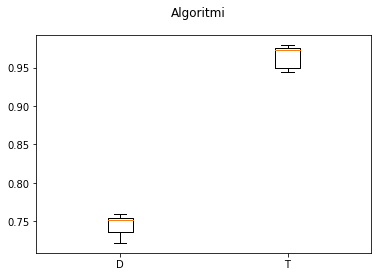

In [28]:
left_yn = Y.value_counts()
left_yes = left_yn[1]
left_no = left_yn[0]
print('Numero di SI: {}\nNumero di NO: {}'.format(left_yes, left_no))
dataset_yes = df[df['left'] == 0].sample(n = left_yes, replace = False)
dataset_no = df[df['left'] == 1]
print('*' * 100)

dataset_bal = pd.concat([dataset_yes, dataset_no])

X_bal = dataset_bal.drop('left', axis = 1)
Y_bal = dataset_bal['left']

models = []
models.append(('MNB', MultinomialNB()))
models.append(('DT', DecisionTreeClassifier()))

# Metodo per valutare l'accuracy tramite la cross validation (viene chiesta più volte quindi creo il metodo)
def valuta_cvs(X, Y, figure = False):
    print('*' * 100, '\nVALUTO LA CROSS VALIDATION')
    seed = 5
    scoring = 'accuracy'
    scores = []
    names = []
    for name, model in models:
        score = cross_val_score(model, X, Y, cv = seed, scoring = scoring)
        scores.append(score)
        names.append(name)
        print('Accuracy {}: {:.3f} ({:.3f})'.format(name, score.mean() * 100.0, score.std() * 100.0))
    if(figure):
        fig = plt.figure()
        fig.suptitle('Algoritmi')
        ax = fig.add_subplot(111)
        plt.boxplot(scores)
        ax.set_xticklabels(name)
        plt.show()
    
valuta_cvs(X_bal, Y_bal, True)

In [30]:
# Copia dataset
df_dummy = dataset.copy()

# Costruisco i dummies
for column in df_dummy.columns:
    if df_dummy[column].dtypes == 'object':
        print('Elaboro la colonna:', column)
        dummies = (pd.get_dummies(df_dummy[column]))
        df_dummy.drop(column, axis = 1, inplace = True)
        df_dummy = pd.concat([df_dummy, dummies], axis = 1)
        
X_dummies = df_dummy.drop('left', axis = 1)
Y_dummies = df_dummy['left']

valuta_cvs(X_dummies, Y_dummies)

Elaboro la colonna: sales
Elaboro la colonna: salary
**************************************************************************************************** 
VALUTO LA CROSS VALIDATION
Accuracy MNB: 75.712 (0.977)
Accuracy DT: 97.447 (0.981)


### Punto 2.9

In [31]:
# Copia del dataset
df_oneofv = df.copy()

labels = [1, 2, 3, 4, 5, 6]
num = 6
df_oneofv['average_montly_hours'] = pd.qcut(df_oneofv['average_montly_hours'], q = num, labels= labels)

X_oneofv = df_oneofv.drop('left', axis = 1)
Y_oneofv = df_oneofv['left']

# Valutazione
valuta_cvs(X_oneofv, Y_oneofv)

**************************************************************************************************** 
VALUTO LA CROSS VALIDATION
Accuracy MNB: 75.365 (1.654)
Accuracy DT: 97.207 (0.984)


### Punto 2.10

In [32]:
dfz = df.copy()

# Creo una nuova colonna come prodotto tra l'ultima valutazione e il numero di progetti
dfz['num_proj_eva'] = dfz['number_project'] * dfz['average_montly_hours'] * dfz['last_evaluation']

# Trasformo il tempo medio in one in un mese tra 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfz['average_montly_hours'] = scaler.fit_transform(dfz[['average_montly_hours']])
dfz['num_proj_eva'] = scaler.fit_transform(dfz[['num_proj_eva']])


X = dfz.drop('left', axis = 1)
Y = dfz['left']
valuta_cvs(X, Y)

**************************************************************************************************** 
VALUTO LA CROSS VALIDATION
Accuracy MNB: 75.525 (1.334)
Accuracy DT: 97.500 (0.767)
